In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
from sklearn.isotonic import isotonic_regression
import cvxpy as cp
import numpy as np
import csv, os
from scipy import stats
from sklearn import metrics
import itertools
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statistics
from scipy.stats import levene
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set the text properties to use LaTeX fonts
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 28
plt.rcParams['figure.figsize'] = (13,8)  # width, height in inches
plt.rcParams['figure.dpi'] = 300  # dots per inch


def format_func(value, tick_number):
    if value < 10:
        return f"{value:.2f}"
    elif value < 100:
        return f"{value:.1f}"
    else:
        return f"{int(value)}"


# **Census 2020**

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Lists for sigma and corresponding file names
sigma_list = [69.40, 5.00, 16.07, 10.47, 10.47, 5.77, 10.47, 451.13]
name_list = ['US', 'state', 'county', 'pepg', 'tsg', 'tract', 'obg', 'block']

# Loop over sigma values and save each plot
for idx, sigma2 in enumerate(sigma_list):
    # Parameters
    n = 9
    B_n = np.sqrt(n * sigma2)
    rho = n / (2 * sigma2)

    # Define the delta function
    def delta(epsilon):
        i = np.ceil((2 * sigma2 * epsilon - n) / 2).astype(int)
        k = np.ceil((2 * sigma2 * epsilon + n) / 2).astype(int)
        j = 5000
        i_values = np.arange(i, j + 1) / B_n
        gaussian_i = np.exp(-i_values ** 2 / 2)
        gaussian_i = np.sum(gaussian_i) / B_n

        j_values = np.arange(k, j + 1) / B_n
        gaussian_j = np.exp(-j_values ** 2 / 2)
        gaussian_j = np.sum(gaussian_j) / B_n

        return (1 / np.sqrt(2 * np.pi)) * (gaussian_i - np.exp(epsilon) * gaussian_j)

    # Define the zCDP function
    def zCDP(epsilon):
        return np.exp(-(epsilon - rho) ** 2 / (4 * rho))

    eps_max = rho + 2 * np.sqrt(- rho * np.log(10**(-30))) * 65/100

    # Generating epsilon values
    epsilon = np.arange(n / (2 * sigma2), eps_max, 0.0001)
    delta_epsilon = np.log10(np.array([delta(e) for e in epsilon]))
    delta_zCDP = np.log10(np.array([zCDP(e) for e in epsilon]))

    # Plotting
    plt.figure()
    plt.plot(epsilon, delta_zCDP, label="Bureau's", color='red')
    plt.plot(epsilon, delta_epsilon, label='Ours', color='royalblue')
    plt.xlabel(r'\$\epsilon\$')
    plt.ylabel(r'\$\log_{10}(\delta)\$')
    # plt.title(f"{name_list[idx]}")
    plt.legend(loc='lower left')
    plt.ylim(-15, 0)
    plt.grid(axis='y', alpha=0.75)

    # Save the plot with dynamic file name
    file_name = f"/content/drive/MyDrive/Research/Discrete Gaussian Mechanism/Results_2024_09_10/Figures_V1/{name_list[idx]}.svg"
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

# **ACS**

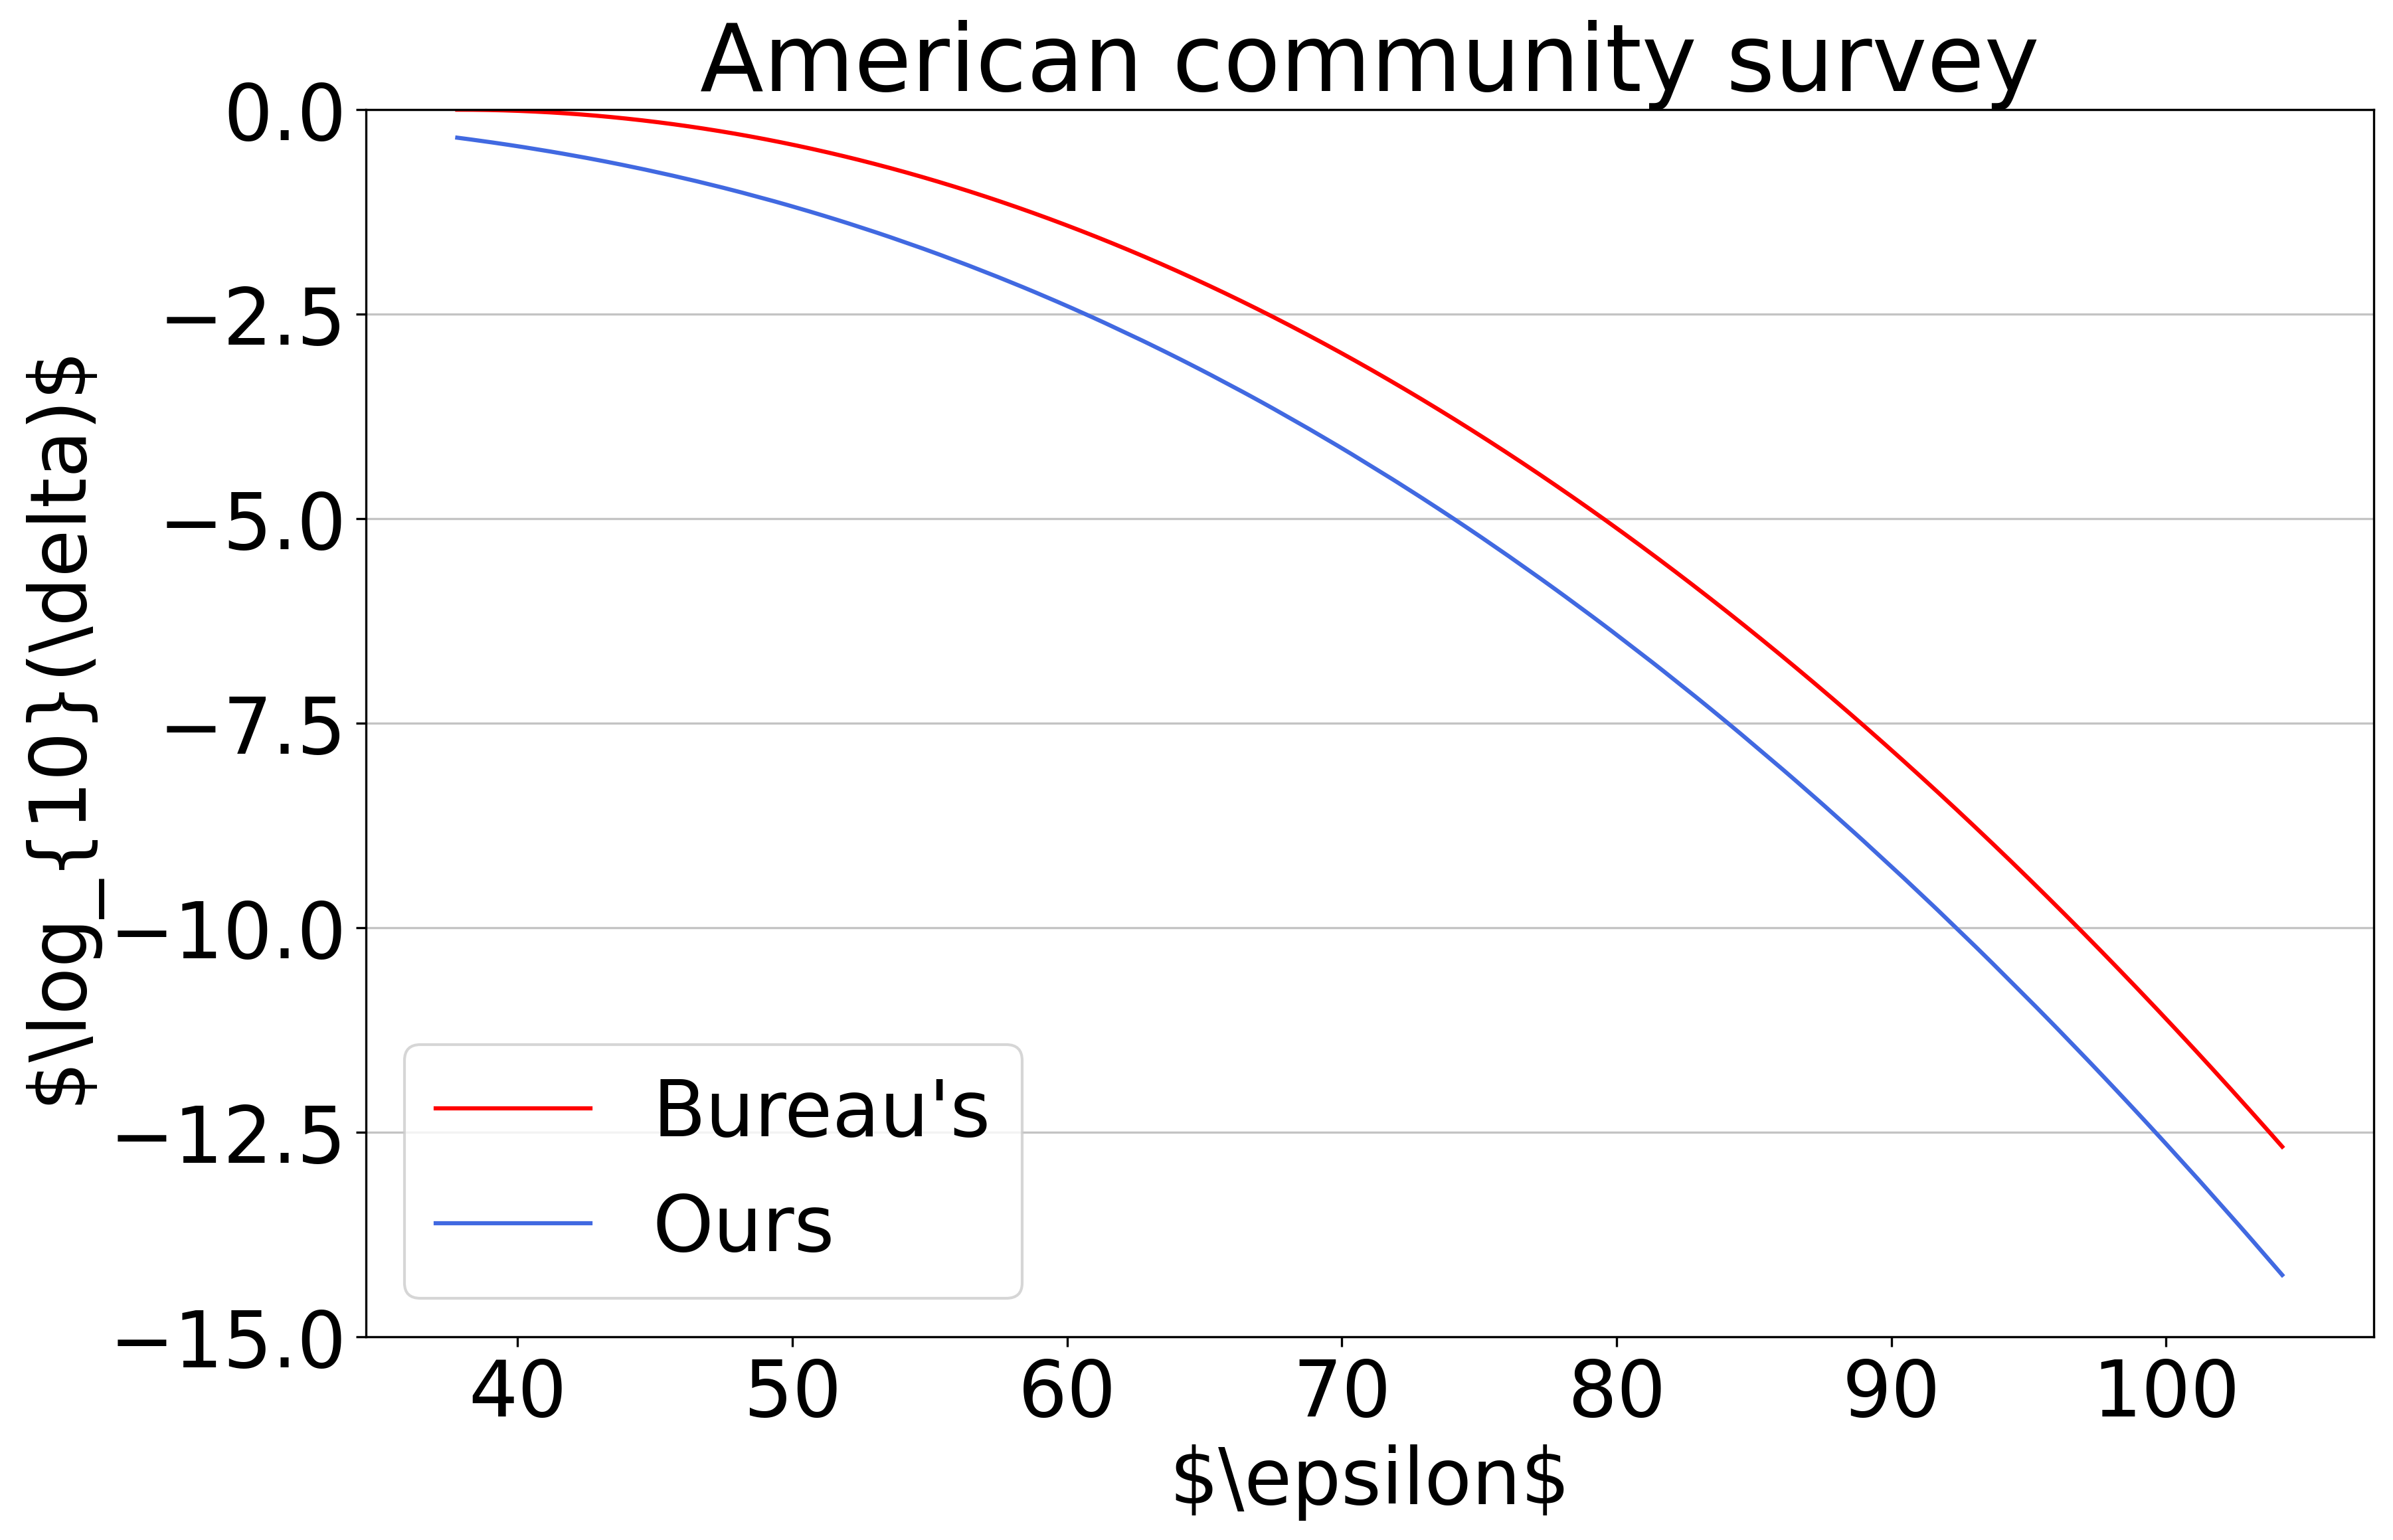

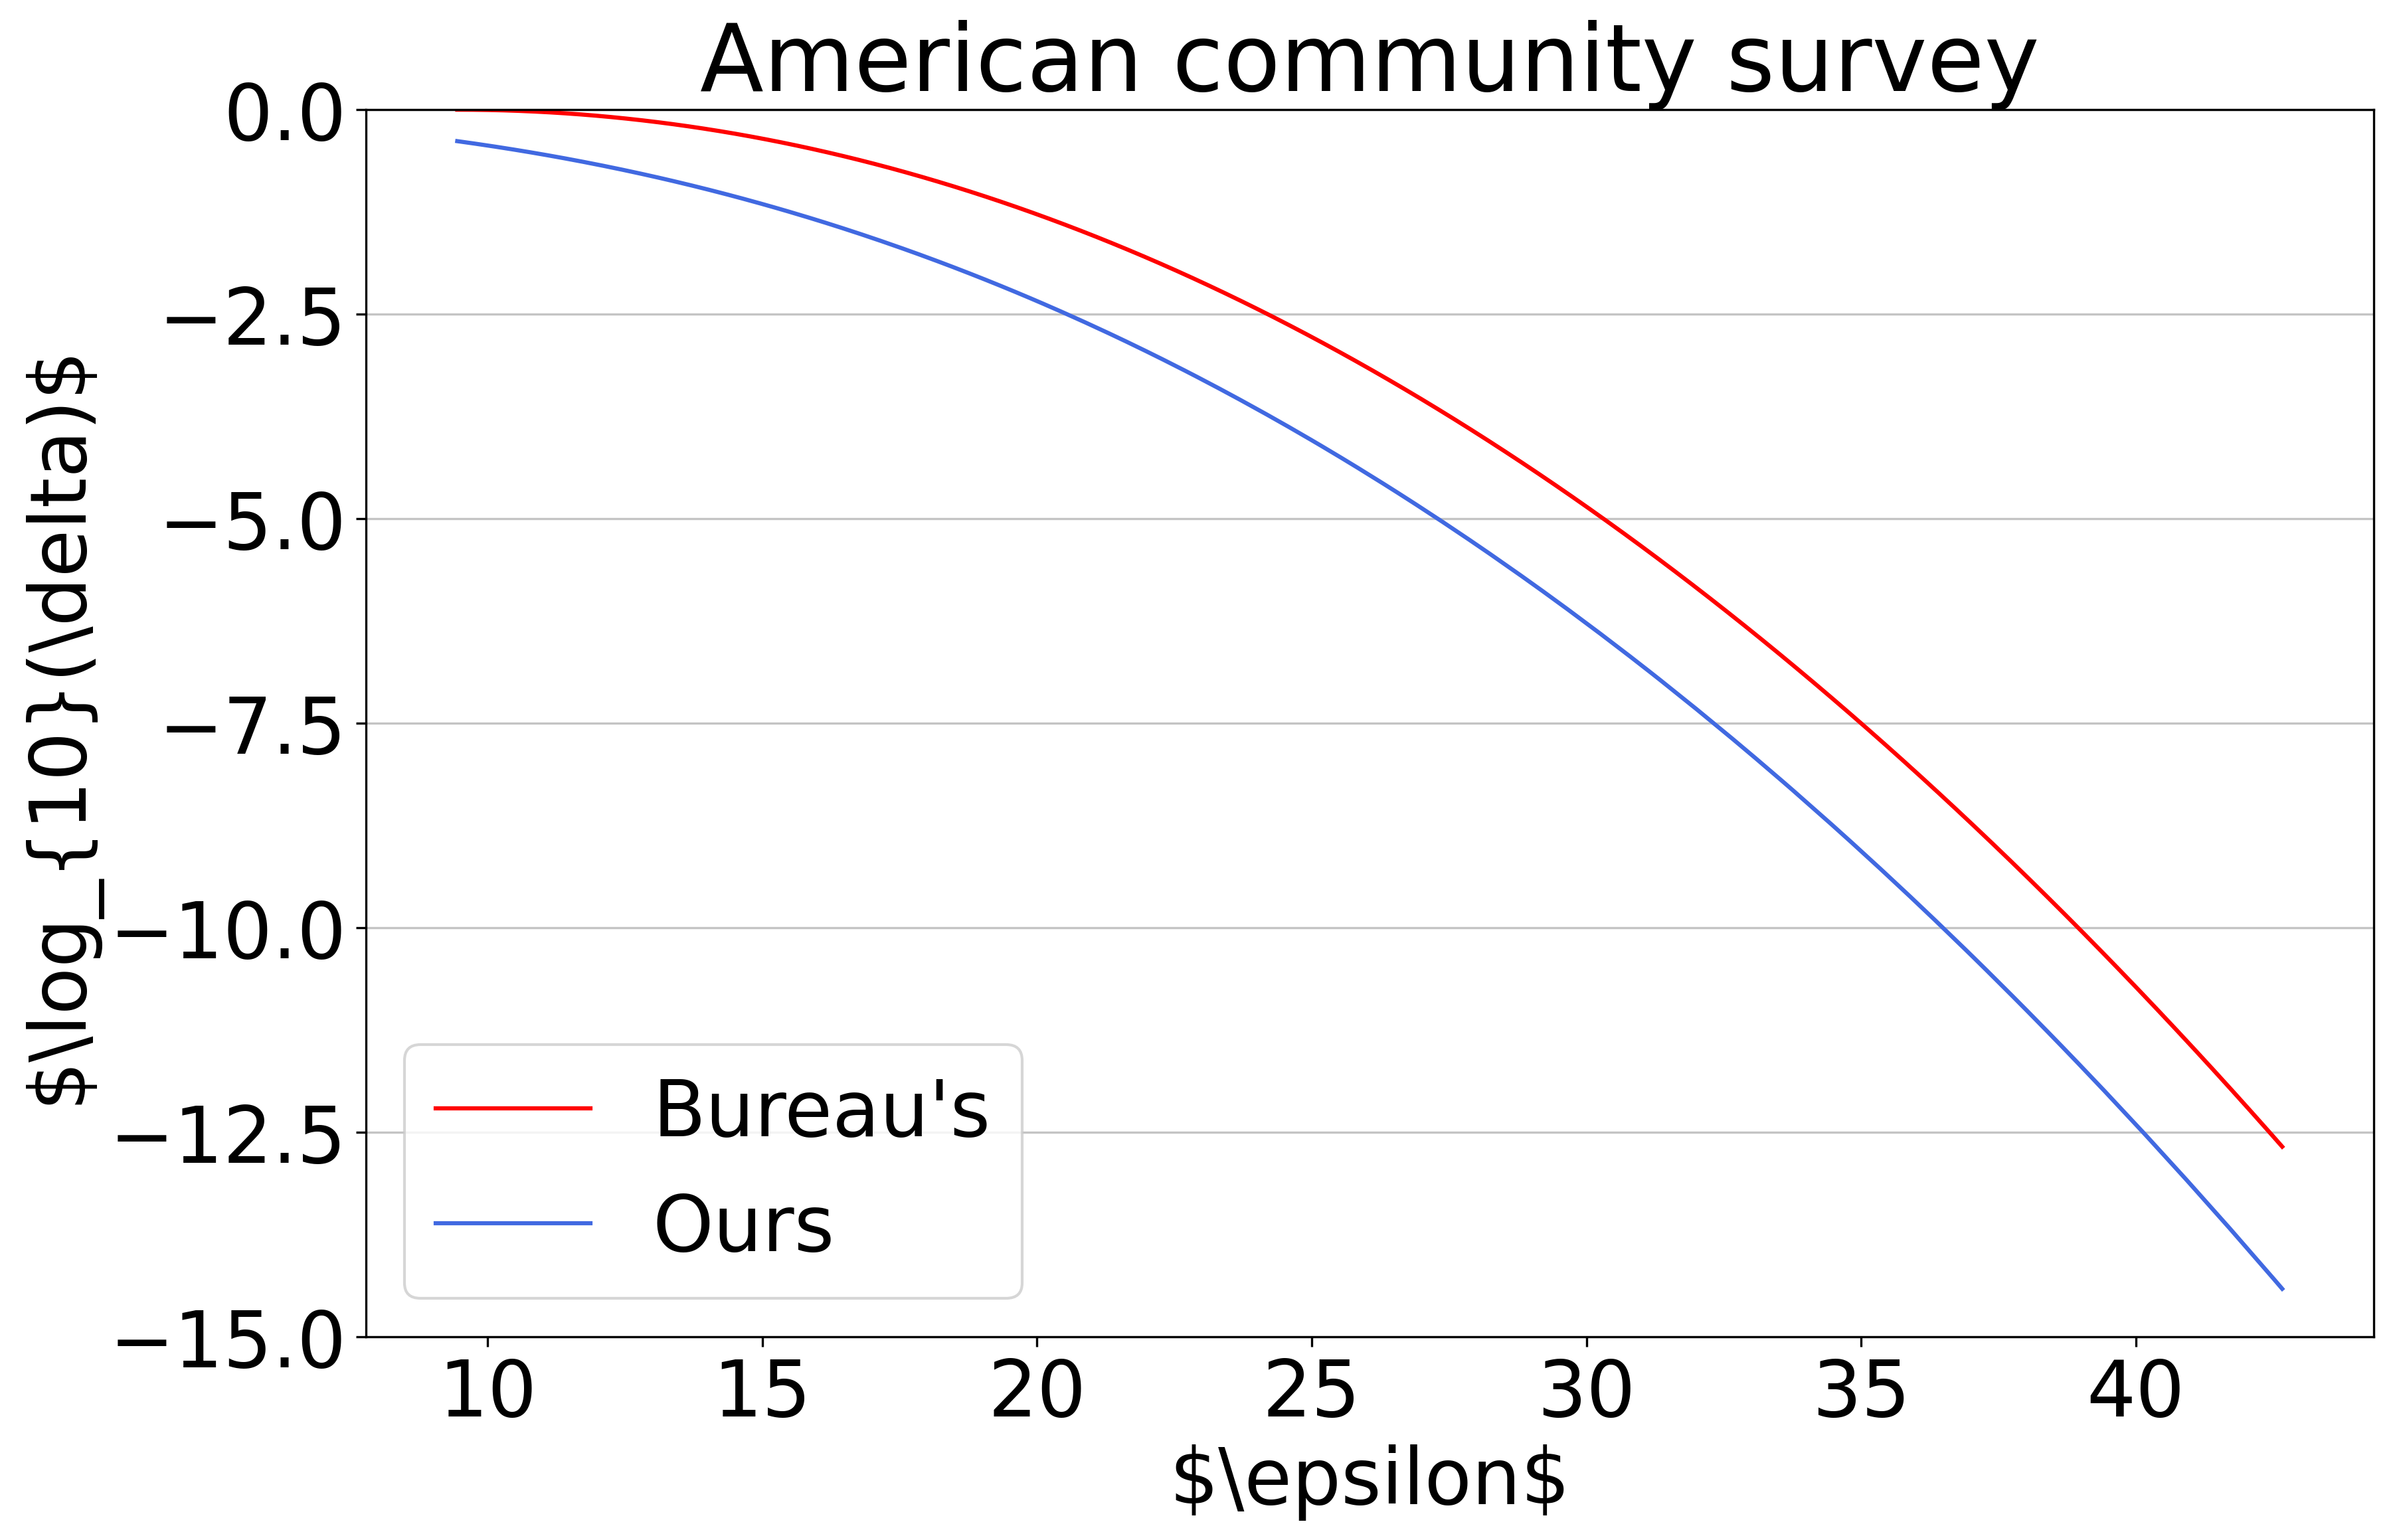

In [32]:
# Lists for sigma and corresponding file names
sigma_list = [25.00, 100.00]
name_list = ['American community survey', 'American community survey']

# Loop over sigma values and save each plot
for idx, sigma2 in enumerate(sigma_list):
    # Parameters
    n = 1890
    B_n = np.sqrt(n * sigma2)
    rho = n / (2 * sigma2)

    # Define the delta function
    def delta(epsilon):
        i = np.ceil((2 * sigma2 * epsilon - n) / 2).astype(int)
        k = np.ceil((2 * sigma2 * epsilon + n) / 2).astype(int)
        j = 10000
        i_values = np.arange(i, j + 1) / B_n
        gaussian_i = np.exp(-i_values ** 2 / 2)
        gaussian_i = np.sum(gaussian_i) / B_n

        j_values = np.arange(k, j + 1) / B_n
        gaussian_j = np.exp(-j_values ** 2 / 2)
        gaussian_j = np.sum(gaussian_j) / B_n

        return (1 / np.sqrt(2 * np.pi)) * (gaussian_i - np.exp(epsilon) * gaussian_j)

    # Define the zCDP function
    def zCDP(epsilon):
        return np.exp(-(epsilon - rho) ** 2 / (4 * rho))

    eps_max = rho + 2 * np.sqrt(- rho * np.log(10**(-30))) * 65/100

    # Generating epsilon values
    epsilon = np.arange(n / (2 * sigma2), eps_max, 0.001)
    delta_epsilon = np.log10(np.array([delta(e) for e in epsilon]))
    delta_zCDP = np.log10(np.array([zCDP(e) for e in epsilon]))

    # Plotting
    plt.figure()
    plt.plot(epsilon, delta_zCDP, label="Bureau's", color='red')
    plt.plot(epsilon, delta_epsilon, label='Ours', color='royalblue')
    plt.xlabel(r'\$\epsilon\$')
    plt.ylabel(r'\$\log_{10}(\delta)\$')
    plt.title(f"{name_list[idx]}")
    plt.legend(loc='lower left')
    plt.ylim(-15, 0)
    plt.grid(axis='y', alpha=0.75)

    # Save the plot with dynamic file name
    file_name = f"/content/drive/MyDrive/Research/Discrete Gaussian Mechanism/Results_2024_09_10/Figures_V1/{name_list[idx]}_sigma_{sigma2}.svg"
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()
